<a href="https://colab.research.google.com/github/anisa1022134/10222134-Anisa_TM/blob/main/Template_Topic_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Penjelasan Dataset yang digunakan
kasus yang diambil adalah: menemukan tema-utama/topik tersembunyi dari ulasan produk Amazon.

penjelasan Nama Kolom
*   reviews.text
*   reviews.rating
*   brand
*   categories
*  length




In [1]:


#!pip install nltk wordcloud scikit-learn seaborn
import pandas as pd
import numpy as np
import re
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from google.colab import drive


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
## Berikan penjelasan terkait data apa yang digunakan diantaranya:
# 1. Kasus yang diambil
# 2. Penjelasan setiap kolomnya
# 3. Import library
# 4. Load data
#uploaded = files.upload()
#import pandas as pd
#data = pd.read_csv(next(iter(uploaded)))
#data.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [10]:
from google.colab import drive
drive.mount('/content/drive')
!unzip -o ./drive/MyDrive/Uts-10222134-Anisa-TM/7817_1.csv.zip -d .

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Archive:  ./drive/MyDrive/Uts-10222134-Anisa-TM/7817_1.csv.zip
  inflating: ./7817_1.csv            


In [11]:
df = pd.read_csv('7817_1.csv')
display(df.head())

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


In [27]:
df = df[['reviews.text', 'reviews.rating', 'brand', 'categories']].copy()

## Data Understanding

Jumlah baris data: 1597
Rata-rata panjang teks (jumlah karakter per ulasan): 909.26
Jumlah data duplikat pada kolom 'reviews.text': 549
Jumlah data kosong pada kolom 'reviews.text': 0


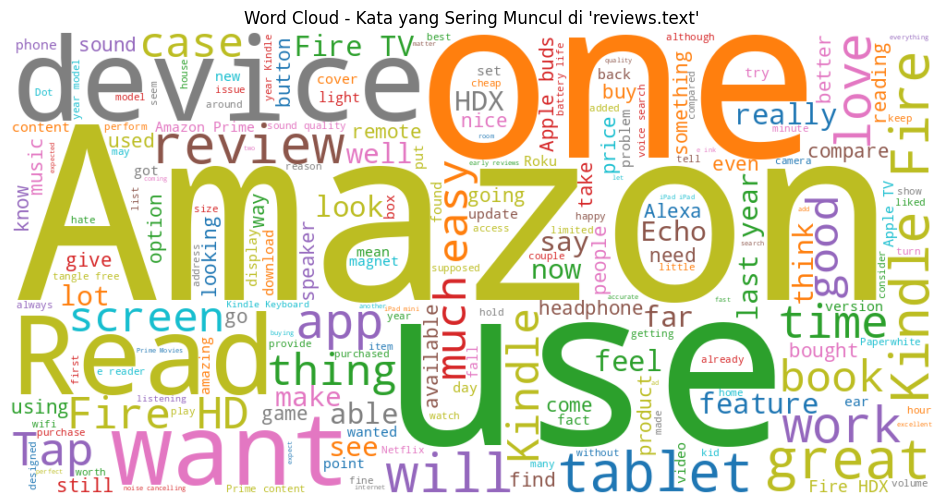


Jumlah data kosong per kolom:
reviews.text        0
reviews.rating    420
brand               0
categories          0
length              0
dtype: int64


In [28]:
# ======================================
# DATA UNDERSTANDING (KHUSUS UNTUK TOPIC MODELING)
# ======================================

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Jumlah baris data
print("Jumlah baris data:", len(df))

# Panjang rata-rata setiap baris teks ulasan
if 'reviews.text' in df.columns:
    df['length'] = df['reviews.text'].astype(str).apply(len)
    print("Rata-rata panjang teks (jumlah karakter per ulasan):", round(df['length'].mean(), 2))

    # Cek data duplikasi pada kolom reviews.text
    dup_count = df['reviews.text'].duplicated().sum()
    print("Jumlah data duplikat pada kolom 'reviews.text':", dup_count)

    # Cek data kosong pada kolom reviews.text
    missing_text = df['reviews.text'].isnull().sum()
    print("Jumlah data kosong pada kolom 'reviews.text':", missing_text)

    # Distribusi data (WordCloud kata yang sering muncul)
    all_text = " ".join(df['reviews.text'].dropna().astype(str))
    if all_text.strip():
        wordcloud = WordCloud(
            width=1000,
            height=500,
            background_color='white',
            colormap='tab10',
            max_words=200
        ).generate(all_text)

        plt.figure(figsize=(12, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title("Word Cloud - Kata yang Sering Muncul di 'reviews.text'")
        plt.show()
    else:
        print("Tidak ada teks untuk membuat word cloud.")

else:
    print("Kolom 'reviews.text' tidak ditemukan di DataFrame.")

# Tambahan: Cek data kosong di semua kolom (untuk dokumentasi)
print("\nJumlah data kosong per kolom:")
print(df.isnull().sum())


In [29]:
# Memilih kolom utama
df = df[['reviews.text', 'reviews.rating', 'brand', 'categories', 'length']]

# Menghapus baris kosong pada teks ulasan (jika ada)
df = df.dropna(subset=['reviews.text']).reset_index(drop=True)

# Melihat 5 data pertama
df.head()


,reviews.text,reviews.rating,brand,categories,length
0,I initially had trouble deciding between the p...,5.0,Amazon,"Amazon Devices,mazon.co.uk",1064
1,Allow me to preface this with a little history...,5.0,Amazon,"Amazon Devices,mazon.co.uk",1424
2,I am enjoying it so far. Great for reading. Ha...,4.0,Amazon,"Amazon Devices,mazon.co.uk",182
3,I bought one of the first Paperwhites and have...,5.0,Amazon,"Amazon Devices,mazon.co.uk",1671
4,I have to say upfront - I don't like coroporat...,5.0,Amazon,"Amazon Devices,mazon.co.uk",1916


## Data Text Processing

In [30]:
# Unduh resource NLTK yang diperlukan jika belum ada
try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab')

#1. Tokenisasi
if 'reviews.text' in df.columns:
    df['tokens'] = df['reviews.text'].apply(word_tokenize)
    #2. Lemmatization
    lemmatizer = WordNetLemmatizer()
    df['lemmatized'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(word.lower()) for word in x])
    #3. Stemming
    stemmer = PorterStemmer()
    df['stemmed'] = df['tokens'].apply(lambda x: [stemmer.stem(word.lower()) for word in x])
    #4. Stopword removal (Tanda baca, angka dan kata)
    stop_words = set(stopwords.words('english'))
    df['clean_tokens'] = df['lemmatized'].apply(lambda x: [
        re.sub(r'[^a-zA-Z]', '', word) for word in x
        if word.isalpha() and word not in stop_words
    ])
    df['clean_text'] = df['clean_tokens'].apply(lambda x: ' '.join(x)
    #6. Matrix correlation (opsional)
    vectorizer = TfidfVectorizer(max_features=1000)
    X = vectorizer.fit_transform(df['clean_text'])
    X_dense = X.toarray()

    tfidf_df = pd.DataFrame(X_dense, columns=vectorizer.get_feature_names_out())
    # Menampilkan 10 kata paling sering muncul (berdasarkan rata-rata skor TF-IDF)
    print("10 kata paling sering muncul berdasarkan rata-rata skor TF-IDF:")
    print(tfidf_df.mean().sort_values(ascending=False).head(10))
else:
    print("Kolom 'reviews.text' tidak ditemukan dalam DataFrame. Tidak dapat melakukan pemrosesan teks.")
#7. Text Vektorisasi - Sudah dilakukan di langkah 6 dengan TfidfVectorizer

10 kata paling sering muncul berdasarkan rata-rata skor TF-IDF:
kindle    0.045916
great     0.044030
sound     0.039971
fire      0.039435
amazon    0.038851
wa        0.036993
like      0.035846
love      0.035291
use       0.034597
echo      0.034499
dtype: float64


## Data Modeling


=== Kata-kata penting per topik ===

Topik 1:
kindle, year, hd, review, tablet, ipad, wa, model, device, hdx

Topik 2:
kindle, like, wa, book, new, amazon, headphone, screen, tablet, paperwhite

Topik 3:
like, great, tablet, headphone, want, thing, quality, doe, work, ha

Topik 4:
sound, echo, tap, great, amazon, speaker, like, alexa, apple, headphone

Topik 5:
prime, tv, content, amazon, roku, box, remote, use, wa, movie

=== Contoh hasil klasifikasi topik ===
                                          clean_text  Dominant_Topic
0  initially trouble deciding paperwhite voyage r...               1
1  allow preface little history wa casual reader ...               1
2  enjoying far great reading original fire since...               1
3  bought one first paperwhites pleased constant ...               1
4  say upfront like coroporate hermetically close...               1


/tmp/ipython-input-2883737642.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Dominant_Topic', data=df, palette='viridis')


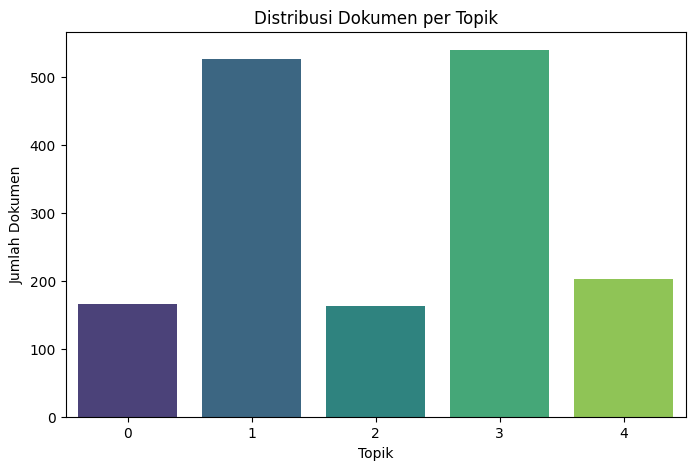

In [31]:
# Berikan Penjelasan tentang model yang dipilih
# ======================================
# 8. TOPIC MODELING MENGGUNAKAN LDA
# ======================================
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import seaborn as sns
import matplotlib.pyplot as plt

# Mengecek apakah kolom clean_text sudah ada
if 'clean_text' in df.columns:
    # 1. Membuat representasi teks dalam bentuk Bag of Words
    count_vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
    count_data = count_vectorizer.fit_transform(df['clean_text'])

    # 2. Membuat dan melatih model LDA
    n_topics = 5  # ubah sesuai kebutuhan (misal 3 atau 6)
    lda = LatentDirichletAllocation(
        n_components=n_topics,
        random_state=42,
        learning_method='batch'
    )
    lda.fit(count_data)

    # 3. Menampilkan kata-kata penting untuk tiap topik
    def show_topics(model, feature_names, n_top_words=10):
        for topic_idx, topic in enumerate(model.components_):
            print(f"\nTopik {topic_idx+1}:")
            top_features = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
            print(", ".join(top_features))

    print("\n=== Kata-kata penting per topik ===")
    show_topics(lda, count_vectorizer.get_feature_names_out(), 10)

    # 4. Menentukan topik dominan untuk tiap dokumen
    topic_values = lda.transform(count_data)
    df['Dominant_Topic'] = topic_values.argmax(axis=1)

    # 5. Menampilkan 5 contoh hasil
    print("\n=== Contoh hasil klasifikasi topik ===")
    print(df[['clean_text', 'Dominant_Topic']].head())

    # 6. Visualisasi distribusi dokumen per topik
    plt.figure(figsize=(8,5))
    sns.countplot(x='Dominant_Topic', data=df, palette='viridis')
    plt.title('Distribusi Dokumen per Topik')
    plt.xlabel('Topik')
    plt.ylabel('Jumlah Dokumen')
    plt.show()

else:
    print("Kolom 'clean_text' tidak ditemukan. Jalankan preprocessing dulu sebelum modeling.")



## Visualisasi Topic yang dimunculkan menggunakan tabel, barchart dan sebagainya

=== TABEL KATA PENTING SEMUA TOPIK ===


,Topic,Word,Weight
0,Topik 1,kindle,513.482820
1,Topik 1,year,377.801612
2,Topik 1,hd,354.596366
3,Topik 1,review,323.445456
4,Topik 1,tablet,308.999078
5,Topik 1,ipad,298.796859
6,Topik 1,wa,295.130517
7,Topik 1,model,278.969053
8,Topik 1,device,272.404309
9,Topik 1,hdx,199.278758


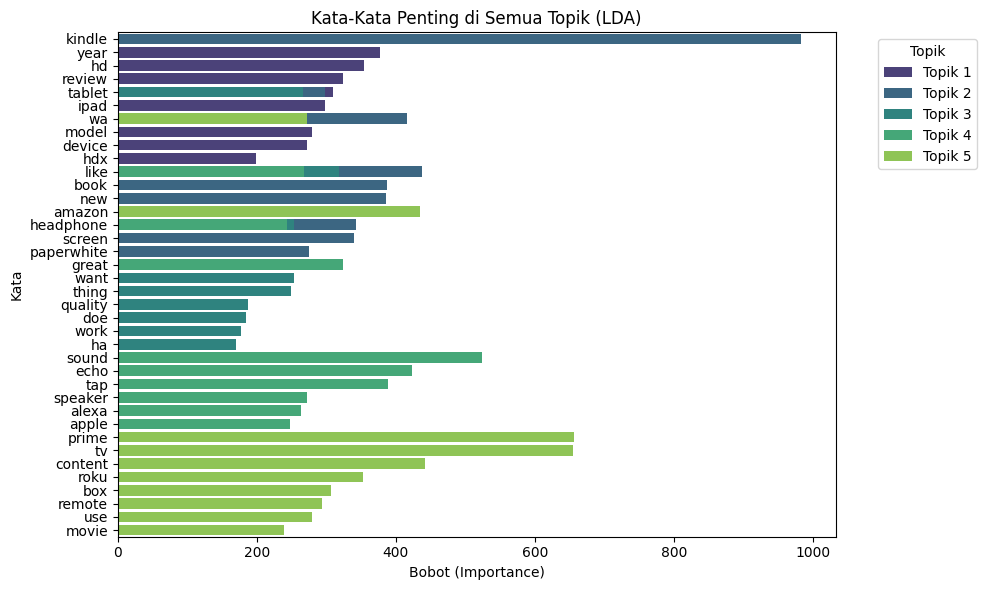

/tmp/ipython-input-223997122.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Dominant_Topic', data=df, palette='coolwarm')


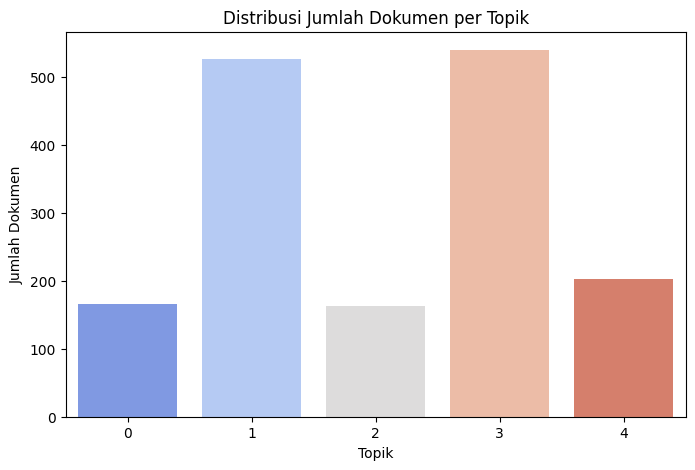

In [37]:
# ======================================
# VISUALISASI HASIL TOPIC MODELING (GABUNGAN)
# ======================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# --- Membuat tabel kata penting per topik ---
def get_top_words_per_topic(model, feature_names, n_top_words=10):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        top_features = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        weights = [topic[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        topics.append(pd.DataFrame({
            'Topic': f'Topik {topic_idx+1}',
            'Word': top_features,
            'Weight': weights
        }))
    return pd.concat(topics, ignore_index=True)

# Buat DataFrame berisi kata penting gabungan semua topik
top_words_df = get_top_words_per_topic(lda, count_vectorizer.get_feature_names_out(), 10)

# TABEL KATA PENTING SEMUA TOPIK
print("=== TABEL KATA PENTING SEMUA TOPIK ===")
display(top_words_df.head(30))  # tampilkan 30 kata teratas dari semua topik

# VISUALISASI GABUNGAN (SEMUA TOPIK)
plt.figure(figsize=(10,6))
sns.barplot(x='Weight', y='Word', hue='Topic', data=top_words_df, dodge=False, palette='viridis')
plt.title('Kata-Kata Penting di Semua Topik (LDA)')
plt.xlabel('Bobot (Importance)')
plt.ylabel('Kata')
plt.legend(title='Topik', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# DISTRIBUSI JUMLAH DOKUMEN PER TOPIK
plt.figure(figsize=(8,5))
sns.countplot(x='Dominant_Topic', data=df, palette='coolwarm')
plt.title('Distribusi Jumlah Dokumen per Topik')
plt.xlabel('Topik')
plt.ylabel('Jumlah Dokumen')
plt.show()



## Gunakan implementasi menggunakan PCA atau T-sne untuk tahap lanjutan

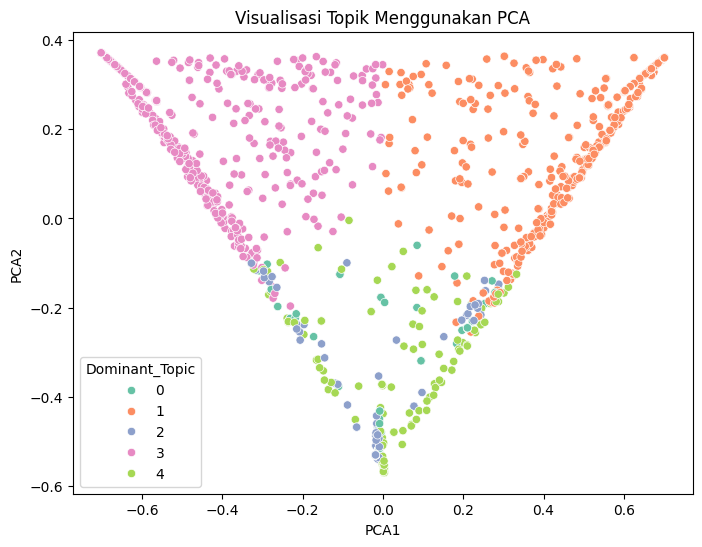

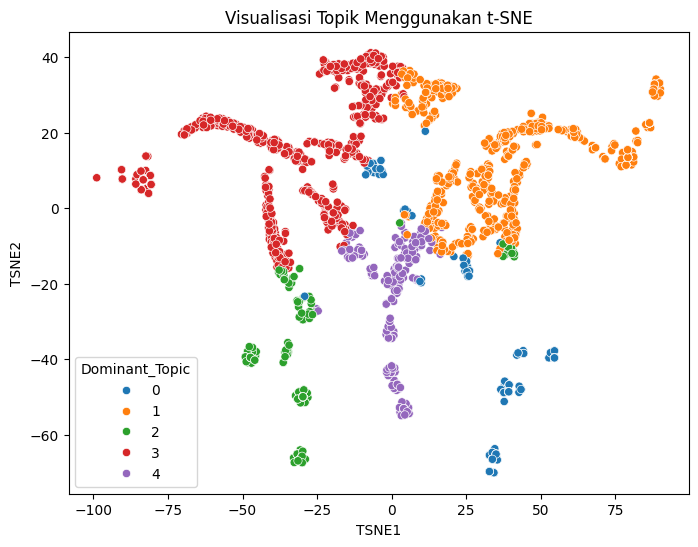

In [38]:
# ======================================
# VISUALISASI LANJUT (PCA & T-SNE)
# ======================================

topic_values = lda.transform(count_data)

# PCA
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(topic_values)
df['PCA1'] = pca_result[:,0]
df['PCA2'] = pca_result[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Dominant_Topic', data=df, palette='Set2')
plt.title('Visualisasi Topik Menggunakan PCA')
plt.show()

# T-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
tsne_result = tsne.fit_transform(topic_values)
df['TSNE1'] = tsne_result[:,0]
df['TSNE2'] = tsne_result[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Dominant_Topic', data=df, palette='tab10')
plt.title('Visualisasi Topik Menggunakan t-SNE')
plt.show()
